# Matplotlib - Subplots

În acest tutorial o să învățăm despre subploturi în Matplotlib. În teorie am văzut că putem să creem un obiect Figure la care să îi adăugăm mai multe axe astfel încât într-un canvas să avem prezente mai multe plot-uri. Acest lucru presupune însă crearea acelor axe manual după cum am văzut, la care trebuie să îi specifică, setul de coordonate pentru a poziționa axele respective. Pentru a ne scuti de partea aceasta, Matplotlib ne pune la dispoziție o metodă care face asta pentru noi, metoda fiind denumită 'plt.subplots()'

Metoda respectivă returnează atât obeicte de tipul Figure cât și axele acestuia. Axele respective sunt returnate sub forma unui numpy array. Ce trebuie să îi oferim acestei metode ca și argumente sunt valori pentru nrows și ncols. Acestea reprezintă numărul de rânduri și de coloane. De exemplu dacă specificăm numărul de rânduri să fie 1 și numărul de coloane să fie 2, atunci p să creeze un singur rând de plot-uri cu două coloane (adică două plot-uri)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.linspace(0, 10, 11)
b = a ** 4

In [4]:
x = np.arange(0, 10)
y = 2 * x

Ca să creem subplot-uri, după cum am spus o să utilizăm metoda 'plt.subplots()'. Aceasta o să o atribuim unui set de două variabile, fig și axes (deoarece metoda respectivă returnează o tuplă, iar prin acest procedeu se face tuple unpacking)

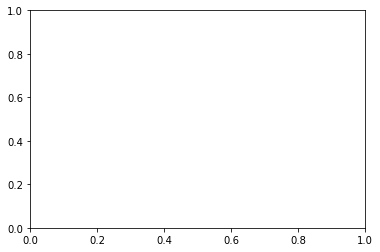

In [5]:
fig, axes = plt.subplots()

În mod default, numărul de rânduri și de coloane este 1, prin urmare se creează un singur plot. Putem să accesăm și ce este prezent în variabila de axes, și o să vedem că este un singur set de axe

In [7]:
axes

<AxesSubplot:>

Din moment ce este doar un set de axe, putem să utilizăm metoda '.plot()' pe acest set de axe

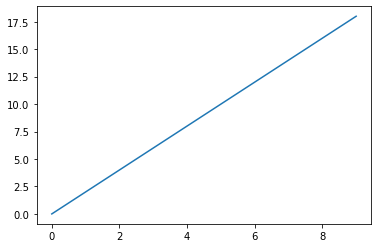

In [8]:
fig, axes = plt.subplots()
axes.plot(x, y)

Fiind un singru set de axe, se poate utiliza metoda pe care am utilizat-o recent, cea de creare de Figure Object și să creem axele după care să facem plot-ul. Ideea de a utiliza 'subplots' este de a crea rapid și ușor mai multe plot-uri. Să realizăm plot-uri pe un singur rând și pe două coloane să vedem cu arată

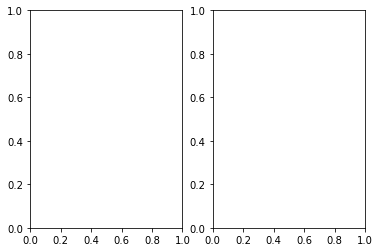

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)

În cazul în care am specificat să fie mai mult de 1 rând sau mai mult de 1 coloană, atunci se generază automat două plot-uri într-un singur canvas care sunt deja poziționate corespunzător. Din moment ce acum sunt două seturi de axe, variabila 'axes' nu mai este un obiect de tip Matplotlib Axes, ci acum este un array din numpy care are două elemente (cele două axe pentru plot-urile respective)

In [10]:
type(axes)

numpy.ndarray

In [11]:
axes.shape

(2,)

Având în vedere faptul că acum sunt mai multe elemente în cadrul acestui array, trebuie să specificăm la ce set de axe facem referire atunci când facem un plot. Pentru asta o să utilizăm partea de indexare

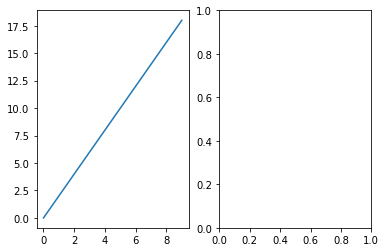

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, y)

În acest moment, pe primul set de axe (axes[0]) acum s-a creat acest grafic pentru datele din variabilele x și y. La fel putem să creem un plot și pentru cel de al doilea set de axe

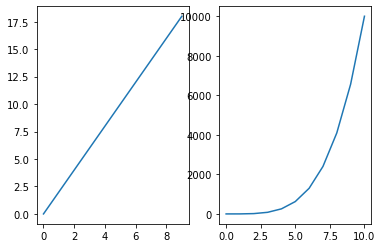

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, y)
axes[1].plot(a, b)

În continuare o să creem subploturi pentru două rânduri și două coloane și o să încercăm să creem din nou aceste grafice

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

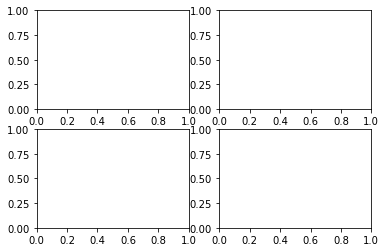

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0].plot(x, y)
axes[1].plot(a, b)

Din codul de mai sus putem observa că s-a returnat o eroare care ne spune că un obiect de tipul numpy.ndarray nu are un atribut denumit plot. În cazul de mai sus nu am avut problema respectivă. Eroarea aceasta apare din cauza faptului că în acest moment, variabila axes este doi dimensionată deoarece există două rânduri și două coloane. Putem să verificăm asta

In [15]:
type(axes)

numpy.ndarray

In [16]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Se poate observa că există o listă de liste în cadrul variabilei axes, ceea ce înseamnă că atunci când utilizăm codul 'axes[0]' se returnează o listă (care este defapt un array din numpy). Din acest motiv ni se spune că un array numpy nu are atributul plot. Pentru a ajunge la subplot trebuie să facem o indexare pe mai multe nivele

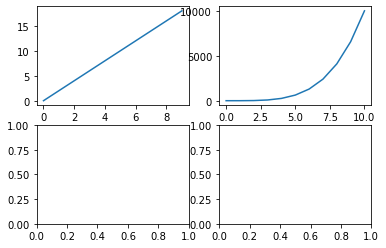

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0][0].plot(x, y)
axes[0][1].plot(a, b)

Din canvasul de mai sus se poate observa că axele unor plot-uri se suprapun. Pentru a ne asigura că spațiul dintre aceste axe este unul destul pentru a nu se suparpune datele o să ne folosim de metoda 'tight_layout()'. Metoda aceasta se va apela pentru librăria matplotlib (adică plt.tight_layout()) și o să se apeleze la final de celulă.

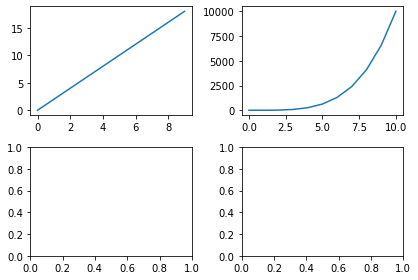

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0][0].plot(x, y)
axes[0][1].plot(a, b)

plt.tight_layout()

Având în acest moment patru ploturi în acest canvas poate dorim să setăm parametrii (titlu, label, limite) seprarați pentru fiecare plot în parte. În cazul acesta, după cum se selectează setul de axe pentru care să facem plot și se apelează metoda plot pentru acel set de axe, la fel se setează și acești parametrii. Se selectează setul de axe după care se setează un anumit parametru

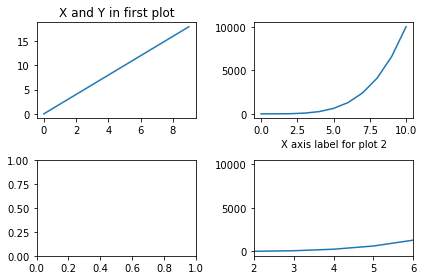

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0][0].plot(x, y)
axes[0][0].set_title('X and Y in first plot')

axes[0][1].plot(a, b)
axes[0][1].set_xlabel('X axis label for plot 2')

axes[1][1].plot(a, b)
axes[1][1].set_xlim(2, 6)

plt.tight_layout()

Prin acest procedeu avem posibilitatea de a seta informații diferite pentru fiecare plot în parte. Dacă se dorește să se seteze un titlu pentru întreg-ul canvas, atunci pentru obiectul Figure o să se apleze metoda suptitle() (super title) prin care se setează un nume generic pentru întregul canvas

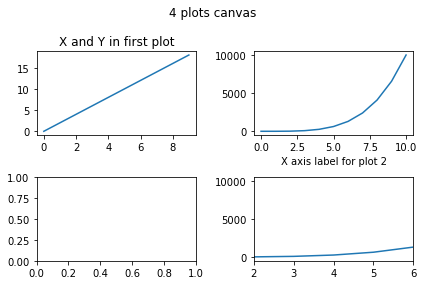

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0][0].plot(x, y)
axes[0][0].set_title('X and Y in first plot')

axes[0][1].plot(a, b)
axes[0][1].set_xlabel('X axis label for plot 2')

axes[1][1].plot(a, b)
axes[1][1].set_xlim(2, 6)

fig.suptitle('4 plots canvas')
plt.tight_layout()

Acei parametrii de a modifica dimensiunea unui canvas și rezoluția sunt prezente și în cadrul metodei 'subplots()' sub aceeași denumire.

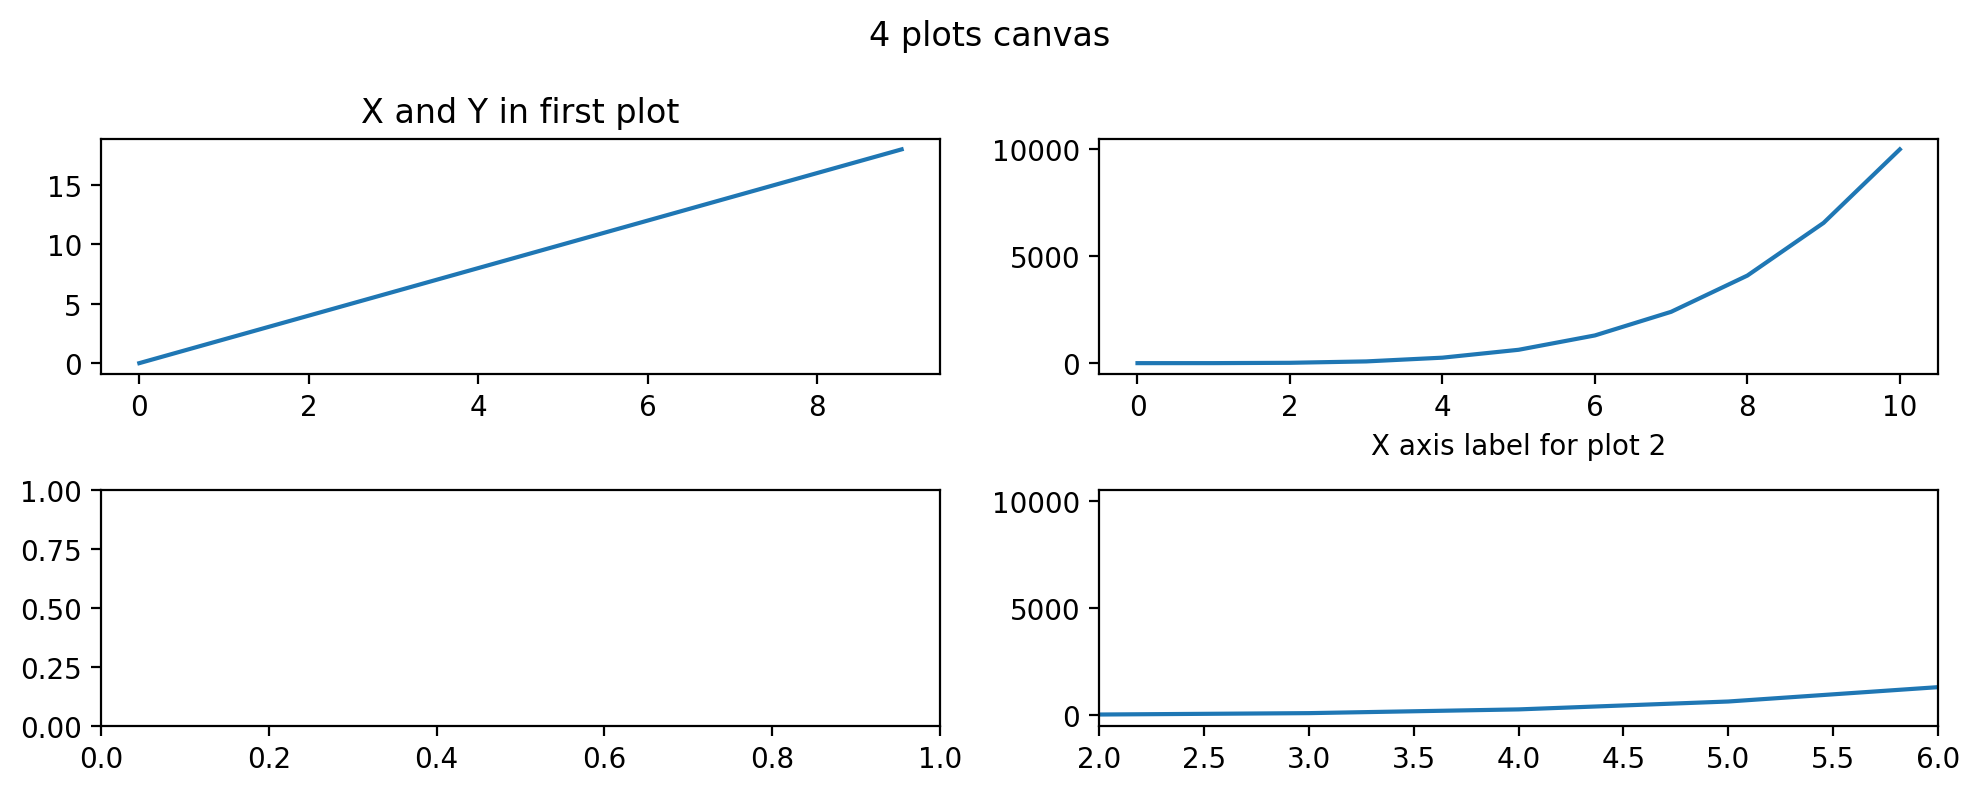

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4), dpi=200)

axes[0][0].plot(x, y)
axes[0][0].set_title('X and Y in first plot')

axes[0][1].plot(a, b)
axes[0][1].set_xlabel('X axis label for plot 2')

axes[1][1].plot(a, b)
axes[1][1].set_xlim(2, 6)

fig.suptitle('4 plots canvas')
plt.tight_layout()

## Recapitulare

În cadrul acestui tutorial am învățat următoarele lucruri:

    1. Cum să creem subploturi într-un singur canvas

        fig, axes = plt.subplots() # creează un singur canvas deoarece nu s-au oferit valori pentru numărul de rânduri sau numărul de coloane

        fig, axes = plt.subplots(nrows=2, ncols=2) # creează plot-uri pe două rânduri și două coloane (adică 4 plot-uri)

    2. Cum accesăm seturile de axe individual din cadrul variabilei axes

        axes[0] # când avem un array uni-dimensionat

        axes[0][1]# când avem un array bi-dimensionat

    3. Cum să setăm parametrii individual pentru fiecare plot în parte

        axes[1][1].set_title('Title for plot located at [1][1]')

        axes[0][1].set_xlabel('X label for plot located at [0][1]')

    4. Cum să setăm un nume general pentru întregul canvas

        fig.suptitle('Super Title')

    5. Cum să ne asigurăm că axele nu se suprapun atunci când se randează plot-urile

        plt.tight_layout()